# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [ ]:
import math
import sys

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [ ]:
wine_quality_df = pd.read_csv('https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz', sep='\t')
wine_quality_df.sample(10)

In [ ]:
wine_quality_df.isna().sum()

There are no missing values in the dataset, so we do not need to drop any rows

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [ ]:
cols = list(wine_quality_df.columns)
col_descriptions = [
    "fixed acidity refers to the acids in wine which do not evaporate at room temperature. Some common fixed acids include citric, malic, succinic, and tartaric",
    "volatile acidity refers to the acids in wine which evaporate at room temperature. Some common volatile acids include cetic, lactic, butyric, formic, and propionic",
    "citric acid is a fixed acid used in winemaking as a perservative, to increase acidity for flavor, or to increase aroma",
    "residual sugar is the sugar left in wine after the fermentation process is completed",
    "chlorides are electrolytes which are used to decrease the acidity of a wine or change the flavor",
    "free sulfur dioxide is the amount of sulfur dioxide which is not bound to molecules, making it able to act as a perservative",
    "total sulfur dioxide is the combination of free sulfur dioxide and any which is bound to molecules",
    "density is measured in wine making to monitor the fermentation process",
    "pH is the measurement of acidity. It is helpful in wine making to measure aspects of a wine such as flavor",
    "sulphates are used in wine making as a perservative",
    "alcohol is measured in wine making to monitor the fermentation process",
    "target represents the quality of a wine, from 0 - 10",
]
for c, d in zip(cols, col_descriptions):
    print(f"column: {c}, description: {d}\n")

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

#### EDA

##### Histograms

In [ ]:
_ = wine_quality_df.hist()
plt.subplots_adjust(wspace=.5, hspace=.8)

In [ ]:
wine_quality_df.skew()

As we can see in the histograms, every feature is positive (right) skewed. Density is almost Gaussian, but still slightly right skewed. This could affect model performance, so we will want to consider scaling as a preprocessing step.

##### Describe

In [ ]:
wine_quality_df.describe()

We can see that these features are not scaled the same, so before training certain models we would want to consider scaling to the columns first

##### Plotting the Target Against 1 Feature

In [ ]:
plot_columns = [c for c in wine_quality_df.columns if c != "target"]
num_cols = 4
num_rows = (len(plot_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols*3.5, num_rows*3.5))
for (i, c) in enumerate(plot_columns):
    plt.subplot(num_rows, num_cols, i+1)
    wine_quality_df.plot.scatter(c, "target", alpha=.2, ax=plt.gca())
    plt.xlabel(c)
    plt.ylabel("target")

##### Boxplots

In [ ]:
_ = plt.boxplot(wine_quality_df)

##### Violin Plots

In [ ]:
_ = plt.violinplot(wine_quality_df)

We can see that no one feature can completely separate the target

We can skip checking boxplots since target is categorical

##### Scatter Matrix Colored by Target

In [ ]:
wine_quality_df_colored = wine_quality_df.copy()
wine_quality_df_colored["color"] = wine_quality_df_colored["target"].map(
    dict(
        zip(wine_quality_df_colored['target'].unique(), plt.rcParams['axes.prop_cycle'].by_key()['color'])
    )
) 

# Commenting this code since it slows down execution significantly. The output can be viewed in the scatter_matrix.png figure
# axes = pd.plotting.scatter_matrix(wine_quality_df_colored, color=wine_quality_df_colored['color'])
# # text rotation snippet from https://stackoverflow.com/questions/58623528/pandas-scatter-matrix-labels-vertical-x-and-horizontal-y-without-being-cut
# for ax in axes.flatten():
#     ax.xaxis.label.set_rotation(90)
#     ax.yaxis.label.set_rotation(0)
#     ax.yaxis.label.set_ha('right')
# plt.tight_layout()
# plt.gcf().subplots_adjust(wspace=0, hspace=0)
# plt.savefig('scatter_matrix.png')

##### Plotting the Target Against Multiple Features

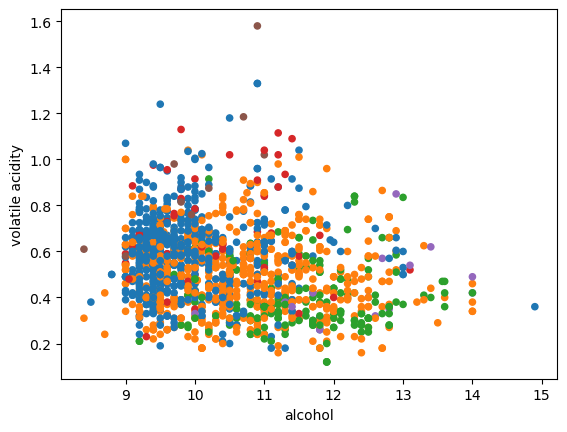

In [29]:
# We can see from the scatter matrix and this fig that there is not a combination of two features which completely separates the target
_ = wine_quality_df_colored.plot.scatter("alcohol", "volatile acidity", c="color")

#### Interesting Charts

In [ ]:
## TODO

YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

In [ ]:
corr = wine_quality_df.corr(numeric_only=True)
corr

In [ ]:
_ = plt.matshow(corr, cmap="Blues")

We can see that the highest correlation is pH and fixed_acidity which has a correlation of -0.682978.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE